In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond9.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,DATE,entry_id,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_length(cm),Fish_weight(g)
0,2021-06-18 12:11:39 CET,18-06-2021,1,27.7,97,7.329,8.48358,0.05393,0,6.947143,4.371429
1,2021-06-18 12:12:08 CET,18-06-2021,2,27.7,97,7.659,8.40641,0.13203,0,6.947143,4.371429
2,2021-06-18 12:12:28 CET,18-06-2021,3,27.7,96,11.230,8.41095,0.27792,0,6.947143,4.371429
3,2021-06-18 12:12:48 CET,18-06-2021,4,27.0,45,9.828,8.40641,0.04398,813,6.947143,4.371429
4,2021-06-18 12:13:07 CET,18-06-2021,5,27.0,45,9.623,8.40641,0.00052,1255,6.947143,4.371429


No data for the population in this pond .


In [4]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [6]:
df_raw1.drop("DATE",axis=1,inplace=True)

In [7]:
df_raw1.columns=['created_at', 'Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
        'Fish_Length', 'Fish_Weight']

In [8]:
df_raw1.head(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight
0,2021-06-18 12:11:39 CET,27.7,97,7.329,8.48358,0.05393,0,6.947143,4.371429
1,2021-06-18 12:12:08 CET,27.7,97,7.659,8.40641,0.13203,0,6.947143,4.371429
2,2021-06-18 12:12:28 CET,27.7,96,11.230,8.41095,0.27792,0,6.947143,4.371429
3,2021-06-18 12:12:48 CET,27.0,45,9.828,8.40641,0.04398,813,6.947143,4.371429
4,2021-06-18 12:13:07 CET,27.0,45,9.623,8.40641,0.00052,1255,6.947143,4.371429


In [9]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

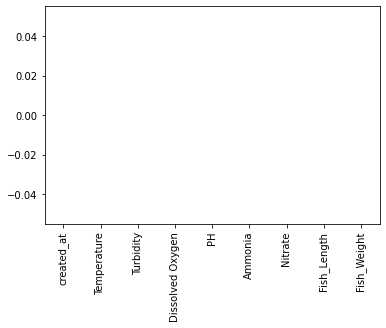

In [10]:
df_raw1.isna().sum().plot.bar()

No missing records

In [11]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [12]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [13]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [14]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time
0,27.7,97,7.329,8.48358,0.05393,0,6.947143,4.371429,2021-06-18 12:11:39,2021-06-18,12:11:39
1,27.7,97,7.659,8.40641,0.13203,0,6.947143,4.371429,2021-06-18 12:12:08,2021-06-18,12:12:08
2,27.7,96,11.230,8.41095,0.27792,0,6.947143,4.371429,2021-06-18 12:12:28,2021-06-18,12:12:28
3,27.0,45,9.828,8.40641,0.04398,813,6.947143,4.371429,2021-06-18 12:12:48,2021-06-18,12:12:48
4,27.0,45,9.623,8.40641,0.00052,1255,6.947143,4.371429,2021-06-18 12:13:07,2021-06-18,12:13:07


Sort DataFrame by Date (Datetime)

In [15]:
df=df_raw1.sort_values(by='Datetime') 

In [ ]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [16]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime
count,151785.0000,151785.0000,151785.0000,151785.0000,151785.0000,151785.0000,151785.0000,151785.0000,151785
mean,24.1969,33.0684,14.3857,6.1789,16180541.3096,568.7414,22.4750,171.7603,2021-08-15 15:19:02.114616320
min,-127.0000,-57.0000,0.0070,2.1102,0.0001,0.0000,6.9471,4.3714,2021-06-18 12:11:39
25%,23.6250,-10.0000,4.6210,4.0031,0.2068,113.0000,13.3629,27.7714,2021-07-09 17:15:10
50%,24.1250,10.0000,8.6340,7.2443,0.5550,160.0000,17.0457,49.0000,2021-07-27 01:47:47
75%,24.6875,91.0000,20.5470,7.4622,1.1430,1074.0000,33.8629,354.2857,2021-09-27 07:11:29
max,27.7000,100.0000,44.9800,15.4517,427000000000.0000,2269.0000,36.1543,431.2000,2021-10-13 04:37:10
std,0.9603,49.9672,13.2661,1.8570,2134729453.4447,509.8153,10.3654,162.8241,NaN


We have 151785 records in total. No noisy data.Start date- 18th of June,'21 and end date- 13th of Oct,'21

In [17]:
d=df["Date"].unique()
print(len(d))
d

101


array([datetime.date(2021, 6, 18), datetime.date(2021, 6, 19),
       datetime.date(2021, 6, 20), datetime.date(2021, 6, 21),
       datetime.date(2021, 6, 22), datetime.date(2021, 6, 23),
       datetime.date(2021, 6, 24), datetime.date(2021, 6, 25),
       datetime.date(2021, 6, 28), datetime.date(2021, 6, 29),
       datetime.date(2021, 6, 30), datetime.date(2021, 7, 1),
       datetime.date(2021, 7, 2), datetime.date(2021, 7, 3),
       datetime.date(2021, 7, 4), datetime.date(2021, 7, 6),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 11), datetime.date(2021, 7, 12),
       datetime.date(2021, 7, 13), datetime.date(2021, 7, 14),
       datetime.date(2021, 7, 15), datetime.date(2021, 7, 16),
       datetime.date(2021, 7, 17), datetime.date(2021, 7, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),


In [18]:
a=df["Fish_Weight"].unique()
print(len(a))
a

99


array([  4.37142857,   4.92      ,   5.46857143,   6.01714286,
         6.56571429,   7.11428571,   7.66285714,   8.21142857,
         9.85714286,  10.40571429,  10.95428571,  11.50285714,
        12.05142857,  12.6       ,  15.12857143,  20.18571429,
        22.71428571,  25.24285714,  27.77142857,  30.3       ,
        32.82857143,  35.35714286,  37.88571429,  40.41428571,
        42.94285714,  45.47142857,  48.        ,  48.1       ,
        48.2       ,  48.3       ,  48.4       ,  48.5       ,
        48.6       ,  48.8       ,  48.9       ,  49.        ,
        49.1       ,  49.2       ,  49.3       ,  49.4       ,
        53.87142857,  58.34285714,  62.81428571,  67.28571429,
        71.75714286,  76.22857143,  80.7       ,  85.17142857,
        89.64285714,  94.11428571,  98.58571429, 103.0571429 ,
       107.5285714 , 112.        , 117.2285714 , 122.4571429 ,
       132.9142857 , 143.3714286 , 148.6       , 153.8285714 ,
       159.0571429 , 179.9714286 , 185.2       , 187.37

So we can see there are 101 unique dates but 99 unique fish weights. This means on certain dates , there were no increment/dec in fish weight. Lets investigate.

In [19]:
date_group=df.groupby("Date", sort = False)

In [20]:
for i in range(len(date_group)):
    print(d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())
    

2021-06-18 ----------->  [4.37142857]
2021-06-19 ----------->  [4.92]
2021-06-20 ----------->  [5.46857143]
2021-06-21 ----------->  [6.01714286]
2021-06-22 ----------->  [6.56571429]
2021-06-23 ----------->  [7.11428571]
2021-06-24 ----------->  [7.66285714]
2021-06-25 ----------->  [8.21142857]
2021-06-28 ----------->  [9.85714286]
2021-06-29 ----------->  [10.40571429]
2021-06-30 ----------->  [10.95428571]
2021-07-01 ----------->  [11.50285714]
2021-07-02 ----------->  [12.05142857]
2021-07-03 ----------->  [12.6]
2021-07-04 ----------->  [15.12857143]
2021-07-06 ----------->  [20.18571429]
2021-07-07 ----------->  [22.71428571]
2021-07-08 ----------->  [25.24285714]
2021-07-09 ----------->  [27.77142857]
2021-07-10 ----------->  [30.3]
2021-07-11 ----------->  [32.82857143]
2021-07-12 ----------->  [35.35714286]
2021-07-13 ----------->  [37.88571429]
2021-07-14 ----------->  [40.41428571]
2021-07-15 ----------->  [42.94285714]
2021-07-16 ----------->  [45.47142857]
2021-07-17 ----

There was no weight gain/loss -

2021-07-23 ----------->  48.6                              2021-07-24 ----------->  48.6

2021-08-15 ----------->  117.2285714            2021-08-16 ----------->  117.2285714

In [21]:
df.to_csv('Pond9.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [34]:
df= pd.read_csv("Pond9.csv", delimiter = ",",low_memory=False )

In [35]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [36]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time
0,27.7,97,7.329,8.48358,0.05393,0,6.947143,4.371429,2021-06-18 12:11:39,2021-06-18,12:11:39
1,27.7,97,7.659,8.40641,0.13203,0,6.947143,4.371429,2021-06-18 12:12:08,2021-06-18,12:12:08
2,27.7,96,11.230,8.41095,0.27792,0,6.947143,4.371429,2021-06-18 12:12:28,2021-06-18,12:12:28
3,27.0,45,9.828,8.40641,0.04398,813,6.947143,4.371429,2021-06-18 12:12:48,2021-06-18,12:12:48
4,27.0,45,9.623,8.40641,0.00052,1255,6.947143,4.371429,2021-06-18 12:13:07,2021-06-18,12:13:07


In [37]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [38]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,27.7,97,7.329,8.48358,0.05393,0,6.947143,4.371429,2021-06-18 12:11:39,2021-06-18,12:11:39,NaT
1,27.7,97,7.659,8.40641,0.13203,0,6.947143,4.371429,2021-06-18 12:12:08,2021-06-18,12:12:08,0 days
2,27.7,96,11.230,8.41095,0.27792,0,6.947143,4.371429,2021-06-18 12:12:28,2021-06-18,12:12:28,0 days
3,27.0,45,9.828,8.40641,0.04398,813,6.947143,4.371429,2021-06-18 12:12:48,2021-06-18,12:12:48,0 days
4,27.0,45,9.623,8.40641,0.00052,1255,6.947143,4.371429,2021-06-18 12:13:07,2021-06-18,12:13:07,0 days


In [39]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [40]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [41]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,27.7,97,7.329,8.48358,0.05393,0,6.947143,4.371429,2021-06-18 12:11:39,2021-06-18,12:11:39,0.0
1,27.7,97,7.659,8.40641,0.13203,0,6.947143,4.371429,2021-06-18 12:12:08,2021-06-18,12:12:08,0.0
2,27.7,96,11.230,8.41095,0.27792,0,6.947143,4.371429,2021-06-18 12:12:28,2021-06-18,12:12:28,0.0
3,27.0,45,9.828,8.40641,0.04398,813,6.947143,4.371429,2021-06-18 12:12:48,2021-06-18,12:12:48,0.0
4,27.0,45,9.623,8.40641,0.00052,1255,6.947143,4.371429,2021-06-18 12:13:07,2021-06-18,12:13:07,0.0


In [42]:
df['Date_diff'].unique()

array([ 0.,  1.,  3.,  2.,  4., 10.])

In [43]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
10057,24.2500,84,23.116,7.71187,0.33489,81,9.875714,9.857143,2021-06-28 12:44:32,2021-06-28,12:44:32,3.0
32723,23.8125,100,14.122,7.52575,0.64671,110,12.351429,20.185714,2021-07-06 14:57:22,2021-07-06,14:57:22,2.0
83782,23.6875,-56,6.132,3.91688,0.48375,858,25.174286,143.371429,2021-08-20 14:57:13,2021-08-20,14:57:13,2.0
83813,24.1875,-57,13.760,3.71714,0.55869,1163,27.524286,179.971429,2021-08-27 11:57:20,2021-08-27,11:57:20,4.0
84725,23.7500,-57,12.006,3.92142,0.15931,1280,28.760000,198.228571,2021-09-03 14:42:46,2021-09-03,14:42:46,2.0
86517,24.3750,-10,2.273,3.63543,0.49479,1012,31.005714,252.685714,2021-09-15 13:55:29,2021-09-15,13:55:29,10.0


In [44]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [45]:
df['Weight_diff'].unique()

array([ 0.        ,  0.54857143,  0.54857143,  0.54857143,  0.54857143,
        1.64571429,  0.54857143,  0.54857142,  0.54857143,  0.54857143,
        2.52857143,  5.05714286,  2.52857142,  2.52857143,  2.52857143,
        2.52857143,  0.1       ,  0.1       ,  0.2       ,  4.47142857,
        4.47142858,  4.47142858,  4.47142861,  4.4714285 ,  4.4714286 ,
        5.2285714 ,  5.2285715 , 10.4571428 , 10.4571429 ,  5.2285714 ,
        5.2285715 , 20.9142857 ,  2.1714286 ,  2.1714285 ,  2.1714286 ,
        4.3428571 , 50.1142857 ,  9.2714286 ,  9.2714285 ,  9.2714286 ,
        9.2714286 ,  4.4428571 ,  4.4428572 ,  4.4428571 ,  5.9       ,
        5.9       ])

In [46]:
date_group=df.groupby("Date", sort = False)

In [47]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,27.7000,97,7.329,8.48358,0.05393,0,6.947143,4.371429,2021-06-18 12:11:39,12:11:39,0.0,0.000000
2021-06-19,22.6875,21,7.729,8.42003,70.51501,112,7.240000,4.920000,2021-06-19 08:21:55,08:21:55,1.0,0.548571
2021-06-20,25.8750,9,0.104,8.30654,240.48914,108,7.532857,5.468571,2021-06-20 00:10:32,00:10:32,1.0,0.548571
2021-06-21,25.3125,13,0.520,8.11588,457.51306,103,7.825714,6.017143,2021-06-21 00:14:41,00:14:41,1.0,0.548571
2021-06-22,23.9375,5,8.453,7.98424,0.00081,1216,8.118571,6.565714,2021-06-22 14:00:47,14:00:47,1.0,0.548571
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,25.5625,-10,8.129,4.20286,0.99275,1488,35.320000,407.600000,2021-10-09 00:00:01,00:00:01,1.0,4.442857
2021-10-10,24.8125,-10,6.280,4.23918,1.87232,1379,35.528571,413.500000,2021-10-10 00:00:01,00:00:01,1.0,5.900000
2021-10-11,24.5625,-10,7.006,4.16201,1.77008,1347,35.737143,419.400000,2021-10-11 00:00:14,00:00:14,1.0,5.900000


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [48]:
d=df["Date"].unique()
print(len(d))
d

101


array([datetime.date(2021, 6, 18), datetime.date(2021, 6, 19),
       datetime.date(2021, 6, 20), datetime.date(2021, 6, 21),
       datetime.date(2021, 6, 22), datetime.date(2021, 6, 23),
       datetime.date(2021, 6, 24), datetime.date(2021, 6, 25),
       datetime.date(2021, 6, 28), datetime.date(2021, 6, 29),
       datetime.date(2021, 6, 30), datetime.date(2021, 7, 1),
       datetime.date(2021, 7, 2), datetime.date(2021, 7, 3),
       datetime.date(2021, 7, 4), datetime.date(2021, 7, 6),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 11), datetime.date(2021, 7, 12),
       datetime.date(2021, 7, 13), datetime.date(2021, 7, 14),
       datetime.date(2021, 7, 15), datetime.date(2021, 7, 16),
       datetime.date(2021, 7, 17), datetime.date(2021, 7, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),


In [49]:
a=df["Fish_Weight"].unique()
print(len(a))
a

99


array([  4.37142857,   4.92      ,   5.46857143,   6.01714286,
         6.56571429,   7.11428571,   7.66285714,   8.21142857,
         9.85714286,  10.40571429,  10.95428571,  11.50285714,
        12.05142857,  12.6       ,  15.12857143,  20.18571429,
        22.71428571,  25.24285714,  27.77142857,  30.3       ,
        32.82857143,  35.35714286,  37.88571429,  40.41428571,
        42.94285714,  45.47142857,  48.        ,  48.1       ,
        48.2       ,  48.3       ,  48.4       ,  48.5       ,
        48.6       ,  48.8       ,  48.9       ,  49.        ,
        49.1       ,  49.2       ,  49.3       ,  49.4       ,
        53.87142857,  58.34285714,  62.81428571,  67.28571429,
        71.75714286,  76.22857143,  80.7       ,  85.17142857,
        89.64285714,  94.11428571,  98.58571429, 103.0571429 ,
       107.5285714 , 112.        , 117.2285714 , 122.4571429 ,
       132.9142857 , 143.3714286 , 148.6       , 153.8285714 ,
       159.0571429 , 179.9714286 , 185.2       , 187.37

In [50]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,12])
    
    

0.5485714289999999
0.5485714289999999
0.5485714279999998
0.5485714290000008
0.5485714279999998
0.5485714289999999
0.5485714280000007
1.6457142859999987
0.5485714330000011
0.54857142
0.5485714299999991
0.5485714300000009
0.5485714299999991
2.5285714299999995
5.057142860000001
2.5285714199999987
2.528571430000003
2.5285714299999995
2.5285714299999995
2.528571429999996
2.5285714300000066
2.5285714299999995
2.5285714199999987
2.5285714299999995
2.5285714299999995
2.5285714299999995
0.10000000000000142
0.10000000000000142
0.09999999999999432
0.10000000000000142
0.10000000000000142
0.10000000000000142
0.0
0.19999999999999574
0.10000000000000142
0.10000000000000142
0.10000000000000142
0.10000000000000142
0.09999999999999432
0.10000000000000142
4.4714285700000005
4.4714285700000005
4.4714285700000005
4.471428580000001
4.4714285700000005
4.4714285700000005
4.4714285700000005
4.4714285700000005
4.4714285700000005
4.4714285700000005
4.471428579999994
4.471428610000004
4.471428500000002
4.47142859

In [51]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,27.7000,97,7.329,8.48358,0.05393,0,6.947143,4.371429,2021-06-18 12:11:39,12:11:39,0.0,0.548571
2021-06-19,22.6875,21,7.729,8.42003,70.51501,112,7.240000,4.920000,2021-06-19 08:21:55,08:21:55,1.0,0.548571
2021-06-20,25.8750,9,0.104,8.30654,240.48914,108,7.532857,5.468571,2021-06-20 00:10:32,00:10:32,1.0,0.548571
2021-06-21,25.3125,13,0.520,8.11588,457.51306,103,7.825714,6.017143,2021-06-21 00:14:41,00:14:41,1.0,0.548571
2021-06-22,23.9375,5,8.453,7.98424,0.00081,1216,8.118571,6.565714,2021-06-22 14:00:47,14:00:47,1.0,0.548571
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,25.5625,-10,8.129,4.20286,0.99275,1488,35.320000,407.600000,2021-10-09 00:00:01,00:00:01,1.0,5.900000
2021-10-10,24.8125,-10,6.280,4.23918,1.87232,1379,35.528571,413.500000,2021-10-10 00:00:01,00:00:01,1.0,5.900000
2021-10-11,24.5625,-10,7.006,4.16201,1.77008,1347,35.737143,419.400000,2021-10-11 00:00:14,00:00:14,1.0,5.900000


In [52]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],11]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,11])
    if (df[df["Date"]==d[i]].iloc[0,11])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-18 ------ 1.0
2021-06-19 ------ 1.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 1.0
2021-06-23 ------ 1.0
2021-06-24 ------ 1.0
2021-06-25 ------ 3.0
2021-06-28 ------ 1.0
2021-06-29 ------ 1.0
2021-06-30 ------ 1.0
2021-07-01 ------ 1.0
2021-07-02 ------ 1.0
2021-07-03 ------ 1.0
2021-07-04 ------ 2.0
2021-07-06 ------ 1.0
2021-07-07 ------ 1.0
2021-07-08 ------ 1.0
2021-07-09 ------ 1.0
2021-07-10 ------ 1.0
2021-07-11 ------ 1.0
2021-07-12 ------ 1.0
2021-07-13 ------ 1.0
2021-07-14 ------ 1.0
2021-07-15 ------ 1.0
2021-07-16 ------ 1.0
2021-07-17 ------ 1.0
2021-07-18 ------ 1.0
2021-07-19 ------ 1.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 1.0
2021-07-29 ------ 1.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 1.0
2021-08-02 ------ 1.0
2021-08-03 ------ 1.0
2021-08-04 ------ 1.0
2021-08-05

In [53]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,
2021-06-18,27.7000,97,7.329,8.48358,0.05393,0,6.947143,4.371429,2021-06-18 12:11:39,12:11:39,1.0,0.548571
2021-06-19,22.6875,21,7.729,8.42003,70.51501,112,7.240000,4.920000,2021-06-19 08:21:55,08:21:55,1.0,0.548571
2021-06-20,25.8750,9,0.104,8.30654,240.48914,108,7.532857,5.468571,2021-06-20 00:10:32,00:10:32,1.0,0.548571
2021-06-21,25.3125,13,0.520,8.11588,457.51306,103,7.825714,6.017143,2021-06-21 00:14:41,00:14:41,1.0,0.548571
2021-06-22,23.9375,5,8.453,7.98424,0.00081,1216,8.118571,6.565714,2021-06-22 14:00:47,14:00:47,1.0,0.548571
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,25.5625,-10,8.129,4.20286,0.99275,1488,35.320000,407.600000,2021-10-09 00:00:01,00:00:01,1.0,5.900000
2021-10-10,24.8125,-10,6.280,4.23918,1.87232,1379,35.528571,413.500000,2021-10-10 00:00:01,00:00:01,1.0,5.900000
2021-10-11,24.5625,-10,7.006,4.16201,1.77008,1347,35.737143,419.400000,2021-10-11 00:00:14,00:00:14,1.0,5.900000


In [54]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 25),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 8, 18),
 datetime.date(2021, 8, 23),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 9, 5),
 datetime.date(2021, 10, 13)]

In [55]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [57]:
df.drop("Date_diff",axis=1,inplace=True)

In [58]:
df.to_csv('cleaned_Pond9.csv')